# Does weighting the Loss Help?

In [19]:
import autorootcwd
import os
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Testing Alphas

In [14]:
DIR = './results/weight_alpha_search'
files = os.listdir(DIR)
rows = []
for f in files:
    alpha = f.split('_')[2]
    try:
        with open(f"{DIR}/{f}/val_metrics.json") as f:
            data = json.load(f)
            rows.append({
                'alpha': alpha,
                'accuracy': data['mean']['song_wise_acc'],
                'root': data['mean']['root'],
                'majmin': data['mean']['majmin'],
                'third': data['mean']['third'],
                'seventh': data['mean']['seventh'],
                'mirex': data['mean']['mirex'],
                'class_wise_acc_mean': data['class_wise_acc_mean'],
                'class_wise_acc_median': data['class_wise_acc_median']
            })
    except:
        print(f)

df = pd.DataFrame(rows)
# Round this clumn to 2 decimal places
df['alpha'] = df['alpha'].astype(float)
df['accuracy'] = df['accuracy'].round(2)
df.sort_values('alpha', ascending=True, inplace=True)

In [15]:
df

,alpha,accuracy,root,majmin,third,seventh,mirex,class_wise_acc_mean,class_wise_acc_median
12,0.05,0.58,0.780604,0.754136,0.747221,0.616754,0.791316,0.188542,0.013094
5,0.10,0.58,0.782808,0.755586,0.749065,0.616738,0.788336,0.195060,0.041552
10,0.15,0.58,0.783265,0.757365,0.751313,0.617164,0.786830,0.199555,0.030568
16,0.20,0.58,0.784736,0.758330,0.752815,0.616707,0.784808,0.207708,0.065482
8,0.25,0.57,0.785769,0.757045,0.752339,0.615575,0.784251,0.213961,0.098497
13,0.30,0.57,0.784511,0.753713,0.750055,0.610157,0.781558,0.219790,0.093297
14,0.35,0.57,0.786673,0.755998,0.753508,0.610509,0.783165,0.233632,0.106850
11,0.40,0.57,0.788061,0.756879,0.755276,0.608511,0.782433,0.239994,0.125878
1,0.45,0.57,0.789283,0.756319,0.755992,0.605466,0.782587,0.246597,0.161339
19,0.50,0.56,0.787713,0.752904,0.754996,0.596041,0.777136,0.258341,0.173400


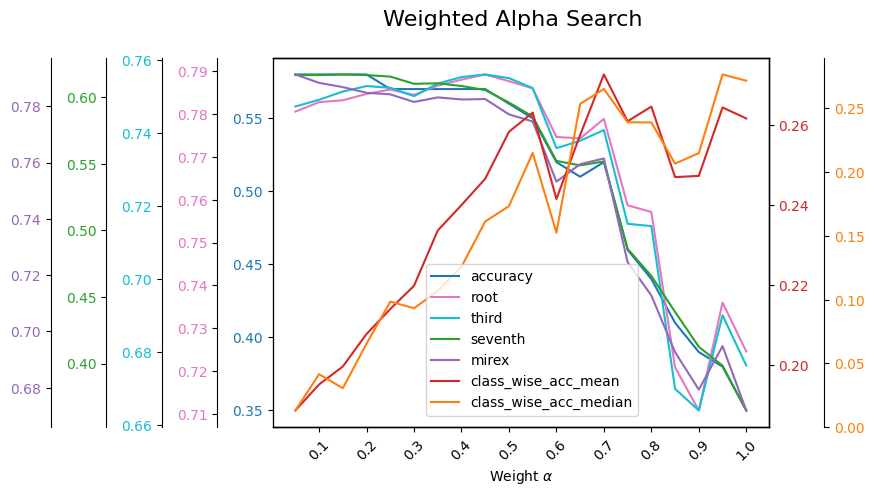

In [72]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel(r'Weight $\alpha$')
ax1.set_xticks(np.linspace(0, 1, 11))

ax1.plot(df['alpha'], df['accuracy'], color=color)
# Remove y-axis ticks
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Also plot root
ax6 = ax1.twinx()
color = 'tab:pink'
ax6.plot(df['alpha'], df['root'], color=color)
ax6.tick_params(axis='y', labelcolor=color)
ax6.yaxis.tick_left()
ax6.spines['left'].set_position(('outward', 40))

# Third
ax7 = ax1.twinx()
color = 'tab:cyan'
ax7.plot(df['alpha'], df['third'], color=color)
ax7.tick_params(axis='y', labelcolor=color)
ax7.yaxis.tick_left()
ax7.spines['left'].set_position(('outward', 80))

# Also plot sevenths
ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(df['alpha'], df['seventh'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.yaxis.tick_left()
ax3.spines['left'].set_position(('outward', 120))

# Also plot mirex
ax5 = ax1.twinx()
color = 'tab:purple'
ax5.plot(df['alpha'], df['mirex'], color=color)
ax5.tick_params(axis='y', labelcolor=color)
ax5.yaxis.tick_left()
ax5.spines['left'].set_position(('outward', 160))

# Now on the right
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(df['alpha'], df['class_wise_acc_mean'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.tick_right()

# Also plot class_wise_acc_median
ax4 = ax1.twinx()
color = 'tab:orange'
ax4.plot(df['alpha'], df['class_wise_acc_median'], color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.yaxis.tick_right()
ax4.spines['right'].set_position(('outward', 40))


# Legend combined for all axes
fig.legend(['accuracy', 'root', 'third', 'seventh', 'mirex', 'class_wise_acc_mean', 'class_wise_acc_median', ], loc='lower center', bbox_to_anchor=(0.53, 0.12))
fig.suptitle('Weighted Alpha Search', fontsize=16)

plt.savefig('./report/figures/weight_alpha_search.png', bbox_inches='tight')
plt.show()

In [17]:
DIR = './results/'
weight_loss_on = f'{DIR}weight_loss_on'
weight_loss_off = f'{DIR}weight_loss_off'
weight_loss_on_files = os.listdir(weight_loss_on)
weight_loss_off_files = os.listdir(weight_loss_off)

In [22]:
rows = []

for f in weight_loss_on_files:
    try:
        with open(f"{weight_loss_on}/{f}/val_metrics.json") as f:
            data = json.load(f)
            rows.append({
                'weight_loss': True,
                'accuracy': data['mean']['song_wise_acc'],
                'root': data['mean']['root'],
                'majmin': data['mean']['majmin'],
                'third': data['mean']['third'],
                'mirex': data['mean']['mirex'],
                'class_wise_acc_mean': data['class_wise_acc_mean'],
                'class_wise_acc_median': data['class_wise_acc_median']
            })
    except:
        print(f)


for f in weight_loss_off_files:
    try:
        with open(f"{weight_loss_off}/{f}/val_metrics.json") as f:
            data = json.load(f)
            rows.append({
                'weight_loss': False,
                'accuracy': data['mean']['song_wise_acc'],
                'root': data['mean']['root'],
                'majmin': data['mean']['majmin'],
                'third': data['mean']['third'],
                'mirex': data['mean']['mirex'],
                'class_wise_acc_mean': data['class_wise_acc_mean'],
                'class_wise_acc_median': data['class_wise_acc_median']
            })
    except:
        print(f)
    

df = pd.DataFrame(rows)

exciting-instrument-7263
complex-song-8739
atonal-audio-7543
atonal-sound-8229
classical-pitch-2178


In [23]:
df

,weight_loss,accuracy,root,majmin,third,mirex,class_wise_acc_mean,class_wise_acc_median
0,True,0.513444,0.774331,0.732898,0.737810,0.759430,0.257619,0.253556
1,True,0.513445,0.774334,0.732896,0.737814,0.759426,0.257647,0.253556
2,True,0.513456,0.774335,0.732908,0.737818,0.759428,0.257616,0.253361
3,True,0.513447,0.774339,0.732895,0.737811,0.759426,0.257659,0.253361
4,True,0.513457,0.774346,0.732910,0.737826,0.759437,0.257652,0.253361
5,True,0.513472,0.774343,0.732912,0.737825,0.759441,0.257621,0.253556
6,True,0.513452,0.774339,0.732909,0.737819,0.759442,0.257560,0.253556
7,True,0.513450,0.774328,0.732888,0.737803,0.759421,0.257650,0.253556
8,True,0.513435,0.774332,0.732895,0.737810,0.759428,0.257652,0.253556
9,True,0.513454,0.774333,0.732904,0.737815,0.759435,0.257668,0.253556


$\implies$ Need different seeds if I'm going to do this!